In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.stats.mstats import trimmed_var
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

In [29]:
df = pd.read_csv("Data.csv")
df.head()

,Country Name,Country Code,Series Name,Series Code,2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,32.6,33.8,34.9,36.1,..
1,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,15.6,16.4,17.4,18.5,..
2,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,83.2,83.8,84.5,85,..
3,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,97.7,97.7,97.7,85.3,..
4,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,97.1,97.1,97.1,81.7,..


In [30]:
data_dict = df[['Series Code', 'Series Name']][:1492]
data_dict.to_csv('data_dict.csv', index=True) 

In [31]:
df["2019 [YR2019]"]=df["2019 [YR2019]"].replace("..", None)
df["2019 [YR2019]"] = df["2019 [YR2019]"].astype(float)

In [32]:
df_trans=pd.pivot_table(df, values="2019 [YR2019]", index="Country Name", columns="Series Code", sort=False)

In [33]:
# Remove last 48 rows as they correspond to enties like 'world' and not individual countries
df_trans=df_trans.iloc[:-48]

In [34]:
df_trans.head()

Series Code,EG.CFT.ACCS.ZS,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,NY.ADJ.NNTY.CD,NY.ADJ.NNTY.PC.CD,NY.ADJ.DCO2.GN.ZS,NY.ADJ.DCO2.CD,...,SG.VAW.ARGU.ZS,SG.VAW.BURN.ZS,SG.VAW.GOES.ZS,SG.VAW.NEGL.ZS,SG.VAW.REFU.ZS,SH.SGR.PROC.P5,DT.NFL.UNEC.CD,DT.NFL.UNEP.CD,DT.NFL.UNTA.CD,DT.NFL.UNWT.CD
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,32.6,15.6,83.2,97.7,97.1,99.5,1.773194e+10,469.477760,1.290995,2.479358e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,82.0,64.7,93.4,100.0,100.0,100.0,1.244998e+10,4361.999293,1.295783,1.969622e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,99.7,98.8,99.9,99.5,98.7,99.8,1.341336e+11,3140.907179,4.167493,6.983390e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.449396e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,100.0,100.0,100.0,100.0,100.0,100.0,NaN,NaN,0.588906,2.038946e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
drop_threshold = round(0.5*len(df_trans)) # we will drop colums that have more than 60% missing values
drop_threshold

108

In [36]:
drop_cols = []
for col in df_trans.columns:
    if df_trans[col].isnull().sum()>drop_threshold:
        drop_cols.append(col)
len(drop_cols)

378

In [37]:
df_trans.drop(columns=drop_cols, axis=1, inplace=True)
df_trans.head()

Series Code,EG.CFT.ACCS.ZS,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,NY.ADJ.NNTY.CD,NY.ADJ.NNTY.PC.CD,NY.ADJ.DCO2.GN.ZS,NY.ADJ.DCO2.CD,...,SL.UEM.INTM.ZS,SL.UEM.INTM.FE.ZS,SL.UEM.INTM.MA.ZS,SL.UEM.TOTL.FE.NE.ZS,SL.UEM.TOTL.MA.NE.ZS,SL.UEM.TOTL.NE.ZS,SL.UEM.1524.FE.NE.ZS,SL.UEM.1524.MA.NE.ZS,SL.UEM.1524.NE.ZS,IP.IDS.NRCT
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,32.6,15.6,83.2,97.7,97.1,99.5,1.773194e+10,469.477760,1.290995,2.479358e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,82.0,64.7,93.4,100.0,100.0,100.0,1.244998e+10,4361.999293,1.295783,1.969622e+08,...,14.259,15.257,13.746,11.316,11.585,11.466,25.851,27.764,26.978,NaN
Algeria,99.7,98.8,99.9,99.5,98.7,99.8,1.341336e+11,3140.907179,4.167493,6.983390e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,324.0
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.449396e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,100.0,100.0,100.0,100.0,100.0,100.0,NaN,NaN,0.588906,2.038946e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Split data into feature matrix (X) and target vector (y)

In [38]:
target = 'EN.ATM.CO2E.PC' # CO2 emissions (metric tons per capita)
y = df_trans[target] 
y.isnull().sum()

26

In [39]:
y.head()

Country Name
Afghanistan       0.297564
Albania           1.749462
Algeria           3.994402
American Samoa         NaN
Andorra           6.287204
Name: EN.ATM.CO2E.PC, dtype: float64

In [40]:
X = df_trans.drop([target], axis=1)
X.head()

Series Code,EG.CFT.ACCS.ZS,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,NY.ADJ.NNTY.CD,NY.ADJ.NNTY.PC.CD,NY.ADJ.DCO2.GN.ZS,NY.ADJ.DCO2.CD,...,SL.UEM.INTM.ZS,SL.UEM.INTM.FE.ZS,SL.UEM.INTM.MA.ZS,SL.UEM.TOTL.FE.NE.ZS,SL.UEM.TOTL.MA.NE.ZS,SL.UEM.TOTL.NE.ZS,SL.UEM.1524.FE.NE.ZS,SL.UEM.1524.MA.NE.ZS,SL.UEM.1524.NE.ZS,IP.IDS.NRCT
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,32.6,15.6,83.2,97.7,97.1,99.5,1.773194e+10,469.477760,1.290995,2.479358e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,82.0,64.7,93.4,100.0,100.0,100.0,1.244998e+10,4361.999293,1.295783,1.969622e+08,...,14.259,15.257,13.746,11.316,11.585,11.466,25.851,27.764,26.978,NaN
Algeria,99.7,98.8,99.9,99.5,98.7,99.8,1.341336e+11,3140.907179,4.167493,6.983390e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,324.0
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.449396e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,100.0,100.0,100.0,100.0,100.0,100.0,NaN,NaN,0.588906,2.038946e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Feature Selection

## Feature Scaling

In [41]:
# Instantiate transformer
ss = StandardScaler()

# Transform `X`
X_scaled_data = ss.fit_transform(X)

# Put `X_scaled_data` into DataFrame
X_scaled = pd.DataFrame(X_scaled_data, columns=X.columns, index=X.index)

print("X_scaled type:", type(X_scaled))
print("X_scaled shape:", X_scaled.shape)
X_scaled.head()

X_scaled type: <class 'pandas.core.frame.DataFrame'>
X_scaled shape: (217, 950)


Series Code,EG.CFT.ACCS.ZS,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,NY.ADJ.NNTY.CD,NY.ADJ.NNTY.PC.CD,NY.ADJ.DCO2.GN.ZS,NY.ADJ.DCO2.CD,...,SL.UEM.INTM.ZS,SL.UEM.INTM.FE.ZS,SL.UEM.INTM.MA.ZS,SL.UEM.TOTL.FE.NE.ZS,SL.UEM.TOTL.MA.NE.ZS,SL.UEM.TOTL.NE.ZS,SL.UEM.1524.FE.NE.ZS,SL.UEM.1524.MA.NE.ZS,SL.UEM.1524.NE.ZS,IP.IDS.NRCT
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-0.923737,-1.044075,0.214607,0.472171,0.468695,0.419938,-0.221602,-0.729220,-0.327193,-0.187070,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,0.386290,0.130367,0.513818,0.566266,0.562507,0.454917,-0.224820,-0.463438,-0.323800,-0.188558,...,0.989727,0.570101,1.159429,0.421847,1.067799,0.840996,0.505386,1.174634,0.944289,NaN
Algeria,0.855672,0.946018,0.704492,0.545811,0.520453,0.440925,-0.150673,-0.546814,1.711529,0.009578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.346146
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.193886,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,0.863628,0.974721,0.707425,0.566266,0.562507,0.454917,NaN,NaN,-0.824800,-0.193714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
X_scaled_summary = X_scaled.aggregate(["mean","std"]).astype(int)

print("X_scaled_summary type:", type(X_scaled_summary))
print("X_scaled_summary shape:", X_scaled_summary.shape)
X_scaled_summary

X_scaled_summary type: <class 'pandas.core.frame.DataFrame'>
X_scaled_summary shape: (2, 950)


Series Code,EG.CFT.ACCS.ZS,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,NY.ADJ.NNTY.CD,NY.ADJ.NNTY.PC.CD,NY.ADJ.DCO2.GN.ZS,NY.ADJ.DCO2.CD,...,SL.UEM.INTM.ZS,SL.UEM.INTM.FE.ZS,SL.UEM.INTM.MA.ZS,SL.UEM.TOTL.FE.NE.ZS,SL.UEM.TOTL.MA.NE.ZS,SL.UEM.TOTL.NE.ZS,SL.UEM.1524.FE.NE.ZS,SL.UEM.1524.MA.NE.ZS,SL.UEM.1524.NE.ZS,IP.IDS.NRCT
mean,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
std,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


# GDP correlation

In [43]:
GDP_columns=list(data_dict.loc[472:491]['Series Code'])

In [44]:
GDP_columns

['NY.GDP.MKTP.KD',
 'NY.GDP.MKTP.KN',
 'NY.GDP.MKTP.CN',
 'NY.GDP.MKTP.CD',
 'NY.GDP.DEFL.ZS',
 'NY.GDP.DEFL.ZS.AD',
 'NY.GDP.MKTP.KD.ZG',
 'NY.GDP.PCAP.KD',
 'NY.GDP.PCAP.KN',
 'NY.GDP.PCAP.CN',
 'NY.GDP.PCAP.CD',
 'NY.GDP.PCAP.KD.ZG',
 'NY.GDP.PCAP.PP.KD',
 'NY.GDP.PCAP.PP.CD',
 'SL.GDP.PCAP.EM.KD',
 'EG.GDP.PUSE.KO.PP.KD',
 'EG.GDP.PUSE.KO.PP',
 'NY.GDP.MKTP.PP.KD',
 'NY.GDP.MKTP.PP.CD',
 'NY.GDP.MKTP.CN.AD']

In [45]:
read_GDP=[]
for col in GDP_columns:
    if col in X_scaled.columns:
        read_GDP.append(col)
#read_GDP=["NY.GDP.PCAP.KD","NY.GDP.MKTP.KD.ZG","NY.GDP.PCAP.KN","NY.GDP.PCAP.KD.ZG"]
X_GDP = X_scaled[read_GDP]
# X_scaled = X_scaled.fillna(X_scaled.mean())

In [ ]:
# vif_data = pd.DataFrame()
# vif_data["Feature"] = X_scaled.columns
# vif_data["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]

In [ ]:
# vif_data["VIF"].loc[82]

In [ ]:
# vif_data.sort_values(by="VIF").head(20)

In [ ]:
# vif_data["VIF"] = [variance_inflation_factor(self.X.values, i) for i in range(self.X.shape[1])]
# to_drop = vif_data[vif_data["VIF"] > threshold]["Feature"].tolist()
# self.X = self.X.drop(columns=to_drop)


In [46]:
len(read_GDP)

18

In [47]:
len(GDP_columns)

20

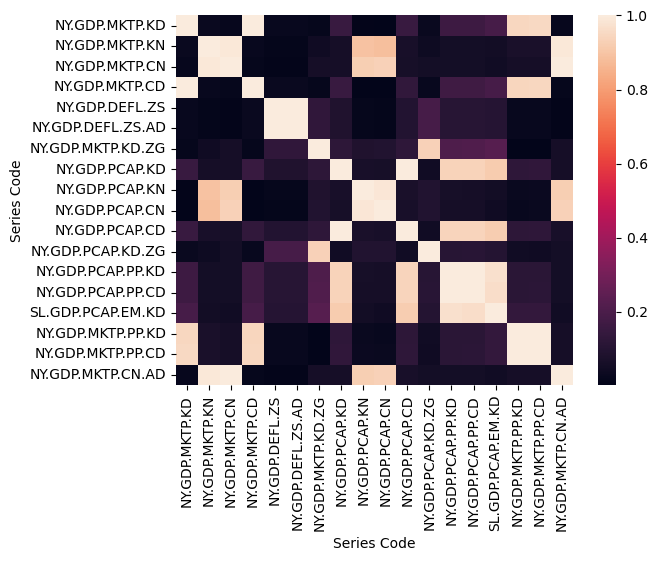

In [48]:
# Create correlation matrix
correlation = X_GDP.select_dtypes("number").corr().abs()
correlation
# Plot heatmap of `correlation`
sns.heatmap(correlation);

In [51]:
X_GDP['NY.GDP.MKTP.PP.KD'].corr(X_GDP['NY.GDP.MKTP.KD'])

0.9488375080715651

In [52]:
px.scatter(X_GDP,x='NY.GDP.MKTP.PP.KD',y='NY.GDP.MKTP.KD')

In [26]:
# Drop features with high correlation
threshold = 0.95
# Select upper triangle of correlation matrix
upper = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(bool))

# Find features with correlation greater than threshold
to_drop = [column for column in upper.columns if any(upper[column] >= threshold)]

In [ ]:
X_reduced = X_GDP.drop(to_drop, axis=1)
X_reduced.head()

In [ ]:
sns.heatmap(X_reduced.select_dtypes("number").corr().abs());

In [ ]:
target_corr = abs(X_reduced.corrwith(y)).sort_values()

In [ ]:
target_corr

In [ ]:
target_corr = abs(X_scaled[read_GDP].corrwith(y)).sort_values()

In [ ]:
target_corr

In [ ]:
X_scaled['NY.GDP.PCAP.PP.KD'].corr(X_scaled['NY.GDP.PCAP.PP.CD'])

In [ ]:
# Drop features with high correlation
threshold = 0.95
# Select upper triangle of correlation matrix
upper = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(bool))
lower = correlation.where(np.tril(np.ones(correlation.shape), k=-1).astype(bool))

# Find features with correlation greater than threshold
to_drop = [column for column in upper.columns if any(upper[column] >= threshold)]

In [ ]:
upper

In [ ]:
X_reduced = X_GDP.drop(to_drop, axis=1)
X_reduced.head()

In [ ]:
sns.heatmap(X_reduced.select_dtypes("number").corr().abs());